In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# 3 columns: resampled shape, available frames, write time
wt = []
with open("data/write_times_overflow.txt", "r") as f:
    for line in f:
        wt.append([float(item) for item in line.strip().split(',')])
wt = np.array(wt[-100:])
print(wt[:10])
print(wt.shape)

[[3.68000000e+02 9.42000000e+02 1.00135803e-05]
 [3.68000000e+02 5.74000000e+02 1.90734863e-05]
 [3.68000000e+02 2.06000000e+02 5.60371876e-02]
 [3.68000000e+02 3.93400000e+03 1.40666962e-05]
 [3.68000000e+02 3.56600000e+03 1.09672546e-05]
 [3.68000000e+02 3.19800000e+03 1.19209290e-05]
 [3.68000000e+02 2.83000000e+03 1.09672546e-05]
 [3.68000000e+02 2.46200000e+03 1.21593475e-05]
 [3.68000000e+02 2.09400000e+03 1.00135803e-05]
 [3.68000000e+02 1.72600000e+03 9.77516174e-06]]
(100, 3)


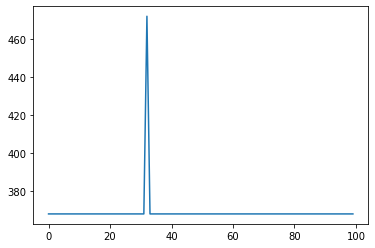

In [26]:
plt.plot(wt[:,0])  # resampled shape

[ 942.  574.  206. 3934. 3566. 3198. 2830. 2462. 2094. 1726.]


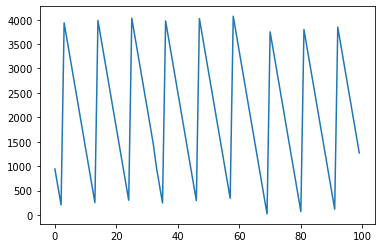

In [27]:
plt.plot(wt[:,1])  # available frames
print((wt[:10,1]))

[1.00135803e-05 1.90734863e-05 5.60371876e-02 1.40666962e-05
 1.09672546e-05 1.19209290e-05 1.09672546e-05 1.21593475e-05
 1.00135803e-05 9.77516174e-06]


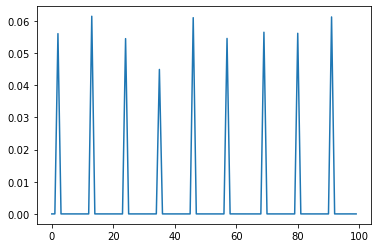

In [28]:
plt.plot(wt[:,2])  # write time
print((wt[:10,2]))

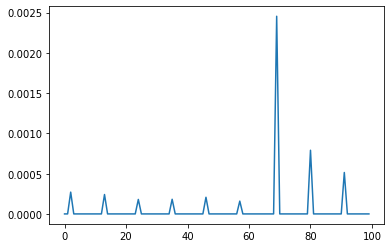

In [29]:
plt.plot(wt[:,2]/(wt[:,1]+1))  # write time over available

[1.09672546e-05 4.48202029e-08 3.23060405e-08 9.97476547e-09
 2.97215573e-08 2.71656558e-08 3.37759654e-07 1.09672546e-05
 3.81211278e-08 3.23060405e-08]


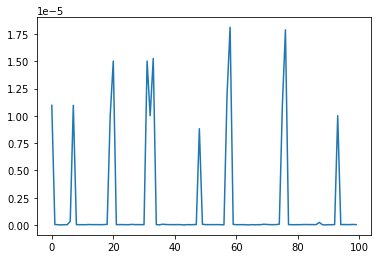

In [16]:
plt.plot(wt[:,2]/(wt[:,0]+1))  # write time over resampled
print(wt[:10,2]/(wt[:10,0]+1))

# 3e-8 per sample means 0.0013s per 44100 samples
# 1.5e-4 per sample means 6.6s per 44100 samples!

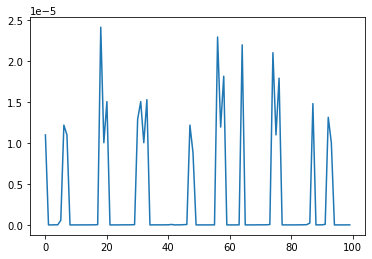

In [17]:
plt.plot(wt[:,2]/(wt[:,1]-wt[:,0]+1))  # write time over avail - resampled

In [ ]:
# ok but now what happens when the buffer gets reset?
# if the times are still about equal, then we can count it as a constant factor
# the get available method is 3e-6
# 1/144100 is 2.2e-5
# 1/60 is 0.0167
# per loop only audio avg is 0.0015
# looks like buffer refill does not change anything